<h1 dir="rtl" align="left">
Social Networks HW3 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# **Imports & Loading Data**

In [1]:
from Social_network_evolution import SchoolNetworkAnalyzer
import pandas as pd

base_path_b = 'Networks/Part_B'

analyzer = SchoolNetworkAnalyzer(base_path_b)
analyzer.load_data()

Data loaded successfully for days: [1, 30, 60, 90]


# **Closure Analysis**

In [3]:
closure_stats = analyzer.analyze_closure_mechanisms()

print("Analysis of New Edge Formation (Closure Mechanisms)")
closure_df = pd.DataFrame(closure_stats).T
print(closure_df)

closure_df_pct = closure_df.div(closure_df['new_edges_count'], axis=0) * 100
print("\nPercentage of New Edges by Mechanism")
print(closure_df_pct[['triadic_closure_count', 'membership_closure_count', 'focal_smoking_closure_count']].round(2))

Analysis of New Edge Formation (Closure Mechanisms)
        new_edges_count  triadic_closure_count  membership_closure_count  \
1->30               287                     12                       186   
30->60              746                    705                       275   
60->90              944                    635                       939   

        focal_smoking_closure_count  pure_random_or_other  
1->30                            73                    54  
30->60                          222                     0  
60->90                           75                     1  

Percentage of New Edges by Mechanism
        triadic_closure_count  membership_closure_count  \
1->30                    4.18                     64.81   
30->60                  94.50                     36.86   
60->90                  67.27                     99.47   

        focal_smoking_closure_count  
1->30                         25.44  
30->60                        29.76  
60->90        

<div dir="rtl">

در این بخش، چگونگی شکل‌گیری یال‌های جدید در شبکه طی سه بازه زمانی (روز ۱ تا ۳۰، ۳۰ تا ۶۰، و ۶۰ تا ۹۰) بررسی شده است. تمرکز اصلی بر روی سه مکانیزم اصلی بستار است:
1.  **بستار مثلثی (Triadic Closure):** تمایل افراد به دوستی با "دوستان دوستان" خود.
2.  **بستار عضویت (Membership Closure):**تمایل به برقراری ارتباط با افراد هم‌گروه .
3.  **بستار کانونی (Focal Closure):** شکل‌گیری ارتباط بر اساس یک صفت مشترک خاص (سیگاری بودن هر دو طرف).

###  نتایج آماری شکل‌گیری یال‌ها
جدول زیر درصد یال‌های جدیدی را نشان می‌دهد که توسط هر یک از مکانیزم‌های فوق قابل توجیه هستند.
*(توجه: جمع درصدها می‌تواند بیشتر از ۱۰۰ باشد، زیرا یک یال ممکن است همزمان چندین ویژگی را داشته باشد؛ مثلاً دو نفر هم هم‌کلاسی باشند و هم دوست مشترک داشته باشند).*

| بازه زمانی | تعداد یال‌های جدید | Triadic Closure (%) | Membership Closure (%) | Focal Closure (Smoking) (%) |
| :---: | :---: | :---: | :---: | :---: |
| **۱ تا ۳۰** | ۲۸۷ | ۴.۱۸٪ | **۶۴.۸۱٪** | ۲۵.۴۴٪ |
| **۳۰ تا ۶۰** | ۷۴۶ | **۹۴.۵۰٪** | ۳۶.۸۶٪ | ۲۹.۷۶٪ |
| **۶۰ تا ۹۰** | ۹۴۴ | ۶۷.۲۷٪ | **۹۹.۴۷٪** | ۷.۹۴٪ |

###  روند تکامل شبکه

####  روز ۱ تا ۳۰: شکل‌گیری اولیه مبتنی بر مجاورت (Proximity)
* **سلطه هم‌کلاسی‌ها (Membership ~65%):** در ماه اول، بیشترین عامل ایجاد دوستی "حضور در یک کلاس مشترک" است. این کاملاً طبیعی است؛ دانش‌آموزان هنوز شبکه گسترده‌ای ندارند و با کسانی ارتباط می‌گیرند که هر روز آن‌ها را می‌بینند.
* **ضعف بستار مثلثی (Triadic ~4%):** از آنجا که شبکه در روز اول بسیار Sparse است، هنوز "دوستان مشترک" زیادی وجود ندارند که واسطه آشنایی‌های جدید شوند.
* **خوشه‌بندی سیگاری‌ها (Focal ~25%):** یک چهارم یال‌های جدید بین دو فرد سیگاری شکل گرفته است. این نشان می‌دهد که سیگاری‌ها در همان ابتدا تمایل دارند یکدیگر را پیدا کنند.

####  روز ۳۰ تا ۶۰: انفجار روابط اجتماعی (Social Expansion)
* **اوج‌گیری بستار مثلثی (Triadic ~94.5%):** این بازه، مهم‌ترین مرحله جامعه‌پذیری شبکه است. تقریباً تمام دوستی‌های جدید (۹۴.۵٪) بین افرادی شکل گرفته که حداقل یک دوست مشترک داشته‌اند. مکانیزم "دوست دوست من" در این مرحله عامل اصلی رشد شبکه است.
* **همپوشانی مکانیزم‌ها:** درصدها نشان می‌دهند که بسیاری از روابط همزمان هم Triadic هستند و هم Membership. یعنی دوستی‌ها در حال مستحکم شدن در داخل گروه‌های اجتماعی هستند.

####  روز ۶۰ تا ۹۰: اشباع درون‌گروهی (Saturation)
* **اشباع کلاس‌ها (Membership ~99.5%):** در ماه آخر، تقریبا تمام یال‌های جدید (۹۹.۵٪) بین هم‌کلاسی‌هاست. این نشان می‌دهد که شبکه به سمت **Full Mesh** شدن در داخل کلاس‌ها پیش می‌رود و دانش‌آموزان در حال تکمیل روابط با تمامی هم‌کلاسی‌های باقی‌مانده خود هستند.
* **کاهش نقش سیگار (Focal ~8%):** کاهش شدید درصد بستار کانونی (از ~۳۰٪ به ۸٪) نشان می‌دهد که اکثر سیگاری‌ها قبلاً همدیگر را پیدا کرده و به هم متصل شده‌اند. یال‌های جدید صرفاً برای تکمیل ساختار کلاس هستند و نه لزوماً بر اساس اشتراک در سیگار کشیدن.

</div>

# **Focal Closure & Peer Influence**

In [5]:
new_smokers_df = analyzer.analyze_new_smokers()

print("New Smokers Analysis")
print(f"Total new smokers detected: {len(new_smokers_df)}")

if not new_smokers_df.empty:
    print("\nSample of students who started smoking:")
    print(new_smokers_df.head())
    
    avg_pressure = new_smokers_df['smoker_peer_pressure_pct'].mean()
    print(f"\nAverage smoker friends BEFORE starting to smoke: {avg_pressure:.2f}%")
    
    high_pressure = new_smokers_df[new_smokers_df['smoker_peer_pressure_pct'] >= 50]
    print(f"Number of new smokers who had >50% smoker friends: {len(high_pressure)}")

New Smokers Analysis
Total new smokers detected: 50

Sample of students who started smoking:
  interval  student_id  total_friends_prev  smoker_friends_prev  \
0    1->30          14                   1                    0   
1    1->30          39                   1                    1   
2    1->30          62                   2                    1   
3    1->30          63                   0                    1   
4    1->30          69                   1                    0   

   smoker_peer_pressure_pct  
0                       0.0  
1                     100.0  
2                      50.0  
3                       0.0  
4                       0.0  

Average smoker friends BEFORE starting to smoke: 68.10%
Number of new smokers who had >50% smoker friends: 42


<div dir="rtl">

در طول دوره تکامل شبکه (از روز ۱ تا ۹۰)، تعداد **۵۰ دانش‌آموز** تغییر وضعیت داده و سیگاری شده‌اند. با توجه به جمعیت ۱۲۰ نفری مدرسه، این عدد نشان‌دهنده یک تغییر رفتاری گسترده (حدود ۴۱٪ از کل جمعیت) است.

### Peer Pressure Analysis
برای درک علت این تغییر رفتار، وضعیت شبکه اجتماعی این ۵۰ نفر را **درست قبل از شروع سیگار کشیدن** بررسی کردیم. نتایج زیر نقش پررنگ اطرافیان را تایید می‌کند:

* **میانگین فشار همسالان:** به طور متوسط، **۶۸.۱۰٪** از دوستانِ افرادی که تازه سیگاری شده‌اند، خودشان سیگاری بوده‌اند.
* **تاثیر اکثریت:** از بین ۵۰ سیگاری جدید، **۴۲ نفر (۸۴٪)** در شرایطی تصمیم به سیگار کشیدن گرفتند که **بیش از ۵۰٪ دوستانشان** سیگاری بودند.

### سرایت اجتماعی (Social Contagion)
این آمار نشان می‌دهد که مکانیزم **Focal Closure** (بستار کانونی) در اینجا نه فقط به معنی "یافتن دوستان شبیه به خود"، بلکه به معنی "شبیه شدن به دوستان" عمل کرده است.
به عبارت دیگر، سیگار کشیدن در این مدرسه مثل یک "ویروس اجتماعی" از طریق یال‌های شبکه منتقل شده است. دانش‌آموزانی که در گروه‌هایی با چگالی بالای افراد سیگاری (Smoker-dense clusters) قرار داشتند، با احتمال بسیار بالایی رفتار گروه را پذیرفته و خود نیز سیگاری شده‌اند.

</div>

# **Smokers vs Non-Smokers Compere**

In [7]:
comparison_df = analyzer.compare_groups(day=90)

print("Smokers vs Non-Smokers Profile (Day 90)")
# 0 = Non-Smoker, 1 = Smoker
print(comparison_df)

Smokers vs Non-Smokers Profile (Day 90)
         studies  plays_football  watches_movies      club     degree  count
smokes                                                                      
0       2.060000        0.540000        0.660000  0.680000  21.140000     50
1       1.085714        0.714286        0.757143  0.314286  37.614286     70


<div dir="rtl">

در پایان روز ۹۰، ساختار جمعیت مدرسه کاملاً دگرگون شده است. گروه سیگاری‌ها که احتمالاً در ابتدا در اقلیت بودند، اکنون با **۷۰ نفر (۵۸٪ جمعیت)** تبدیل به اکثریت شده‌اند، در حالی که غیرسیگاری‌ها به ۵۰ نفر کاهش یافته‌اند.

### Lifestyle Contrast
مقایسه میانگین ویژگی‌های این دو گروه، شکاف عمیقی را در سبک زندگی آن‌ها نشان می‌دهد:

| ویژگی | غیر سیگاری‌ها (Non-Smokers) | سیگاری‌ها (Smokers) | تحلیل |
| :---: | :---: | :---: | :--- |
| **میزان مطالعه (Studies)** | **۲.۰۶** | ۱.۰۹ | غیرسیگاری‌ها تقریباً ۲ برابر بیشتر درس می‌خوانند. |
| **عضویت در کلوپ (Club)** | **۰.۶۸** | ۰.۳۱ | غیرسیگاری‌ها مشارکت بیشتری در فعالیت‌های ساختارمند مدرسه دارند. |
| **فوتبال (Football)** | ۰.۵۴ | **۰.۷۱** | سیگاری‌ها فعالیت ورزشی/تفریحی بیشتری دارند. |
| **فیلم (Movies)** | ۰.۶۶ | **۰.۷۶** | سیگاری‌ها زمان بیشتری را صرف سرگرمی می‌کنند. |

**تفسیر:** ما با دو قطب رفتاری مواجهیم: گروه "درس‌خوان و منضبط" (غیرسیگاری) در مقابل گروه "خوش‌گذران و اجتماعی" (سیگاری).

### ۳. تحلیل جایگاه در شبکه (The Popularity Factor)
مهم‌ترین و کلیدی‌ترین یافته در ستون **Degree (درجه مرکزیت)** نهفته است:
* **میانگین درجه غیرسیگاری‌ها:** ۲۱.۱۴
* **میانگین درجه سیگاری‌ها:** **۳۷.۶۱**

این اختلاف فاحش نشان می‌دهد که **سیگاری‌ها به مراتب اجتماعی‌تر و مرکزی‌تر از غیرسیگاری‌ها هستند.** آن‌ها در مرکز شبکه قرار دارند و تعداد دوستان بسیار بیشتری دارند.
این موضوع دقیقاً توضیح می‌دهد که چرا سیگار کشیدن در مدرسه اپیدمی شده است: **افراد محبوب و مرکزی (Influencers)** سیگاری بوده‌اند و به دلیل موقعیت مرکزی‌شان، رفتار خود را با سرعت و قدرت بالا به سایرین دیکته کرده‌اند.

</div>

# **Top Central Students**

In [8]:
top_nodes = analyzer.get_top_central_nodes(day=90, top_n=5)

print("Top 5 Most Central Students (Day 90)")
print(top_nodes)

Top 5 Most Central Students (Day 90)
    id  degree_centrality  raw_degree  smokes gender  class
0   37           0.470588          56       1    boy      2
1   14           0.453782          54       1   girl      1
2  116           0.453782          54       1   girl      4
3   72           0.445378          53       1    boy      3
4   30           0.436975          52       1    boy      2


<div dir="rtl">

با محاسبه **Degree Centrality** در روز ۹۰، پنج دانش‌آموز با بیشترین تعداد ارتباط شناسایی شدند. جدول زیر مشخصات این افراد را نشان می‌دهد:

| رتبه | شناسه دانش‌آموز (ID) | تعداد دوستان (Raw Degree) | وضعیت سیگار | کلاس | جنسیت |
| :---: | :---: | :---: | :---: | :---: | :---: |
| **۱** | **۳۷** | **۵۶** | **سیگاری** | ۲ | پسر |
| **۲** | **۱۴** | **۵۴** | **سیگاری** | ۱ | دختر |
| **۳** | **۱۱۶** | **۵۴** | **سیگاری** | ۴ | دختر |
| **۴** | **۷۲** | **۵۳** | **سیگاری** | ۳ | پسر |
| **۵** | **۳۰** | **۵۲** | **سیگاری** | ۲ | پسر |

### تحلیل نقش Network Elites

#### انحصار قدرت در دست سیگاری‌ها
مهم‌ترین یافته این تحلیل این است که **۱۰۰٪ از ۵ نفر برتر شبکه، سیگاری هستند.**
هیچ دانش‌آموز غیرسیگاری‌ای در بین پرنفوذترین افراد مدرسه حضور ندارد. این موضوع ثابت می‌کند که در این شبکه اجتماعی، "محبوبیت" و "سیگار کشیدن" هم‌بستگی کامل دارند.

#### گستره نفوذ (Reach)
نفر اول (دانش‌آموز ۳۷) با ۵۶ نفر دوست است؛ یعنی به تنهایی با **۴۷٪ از کل جمعیت مدرسه** ارتباط مستقیم دارد. وقتی چنین فردی رفتار جدیدی (مثل سیگار کشیدن) را اتخاذ می‌کند، نفوذ او باعث می‌شود که این رفتار با سرعت ویروسی در شبکه پخش شود.

#### توزیع استراتژیک
این ۵ نفر در تمام کلاس‌های مدرسه (۱، ۲، ۳ و ۴) حضور دارند. این یعنی آن‌ها نه تنها رهبران کلاس خود هستند، بلکه احتمالاً نقش واسطه را برای انتقال فرهنگ سیگار کشیدن از یک کلاس به کلاس دیگر ایفا کرده‌اند.

---
تحلیل تکامل این شبکه اجتماعی نشان داد که چگونه مکانیسم‌های **بستار مثلثی (Triadic Closure)** شبکه را مستحکم کردند و **بستار کانونی (Focal Closure)** حول محور افراد سیگاری شکل گرفت. داده‌ها نشان می‌دهند که ظهور سیگاری‌های جدید یک انتخاب تصادفی نبوده، بلکه نتیجه مستقیم Peer Pressure از سوی افراد مرکزی و محبوب شبکه (Influencers) بوده است که سیگار کشیدن را به عنوان یک هنجار اجتماعی در مدرسه رواج داده‌اند.

</div>

# **Visualization**

Visualizing Day 1...


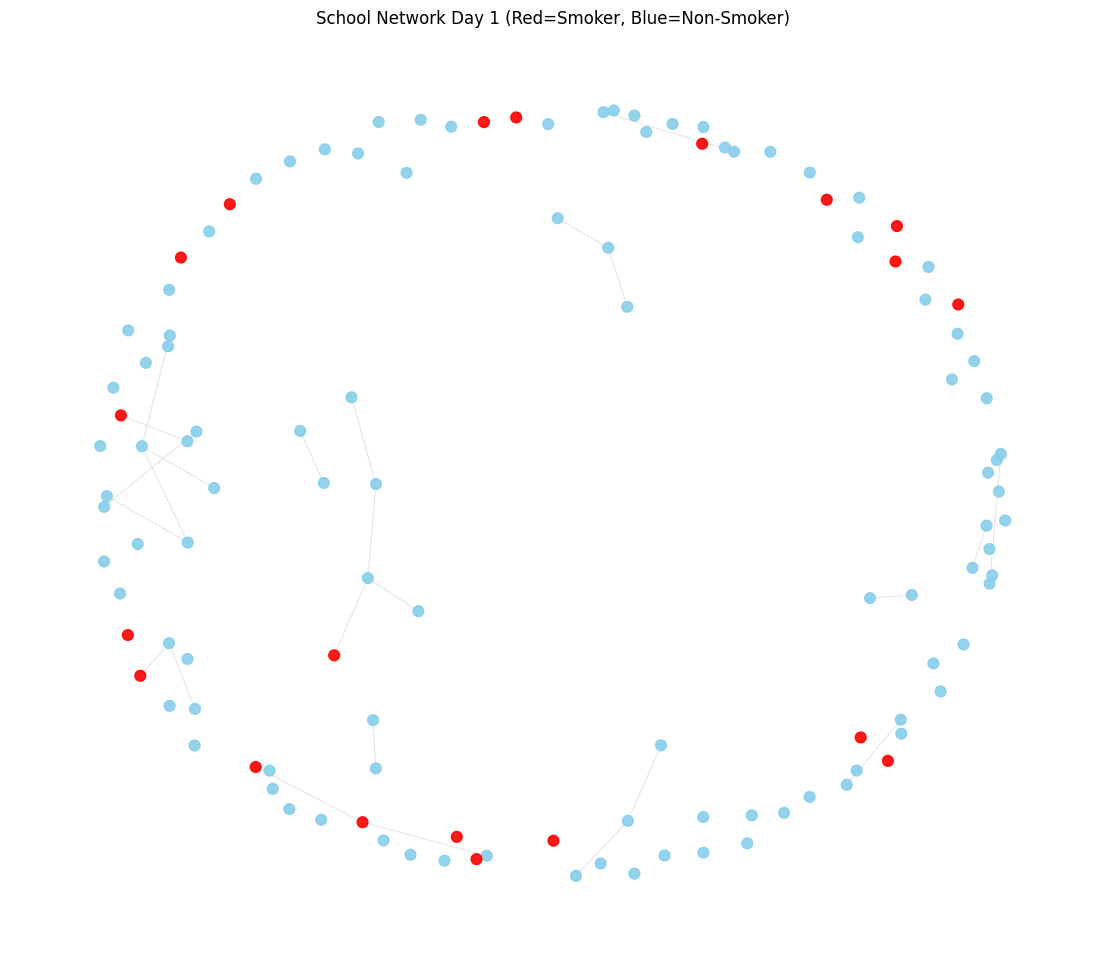

Visualizing Day 90...


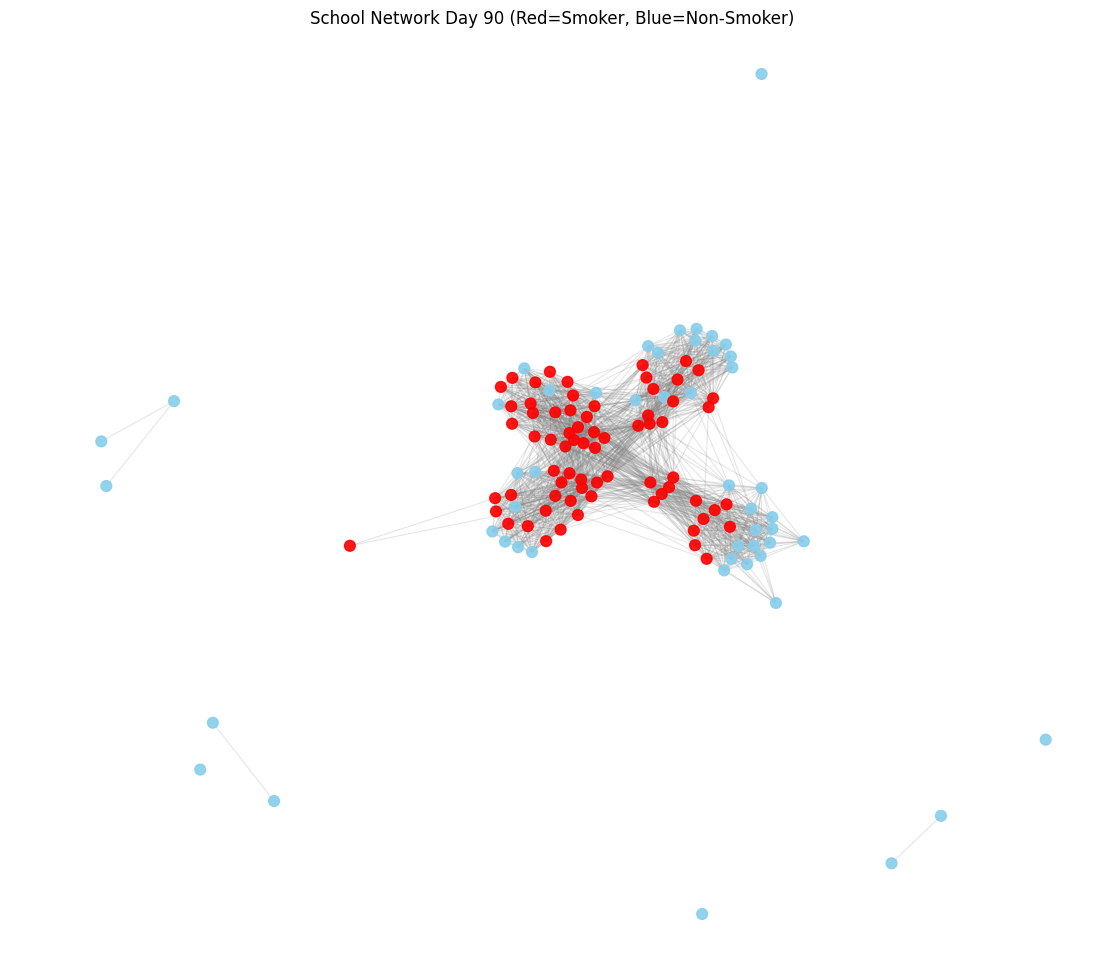

In [9]:
print("Visualizing Day 1...")
analyzer.visualize_network_with_smokers(day=1)

print("Visualizing Day 90...")
analyzer.visualize_network_with_smokers(day=90)

<div dir="rtl">

### روز اول: پراکندگی و انزوا (The Initial Sparse State)
در تصویر روز اول (Day 1)، با شبکه‌ای مواجه هستیم که ویژگی‌های زیر را دارد:
* **ساختار گسسته:** شبکه بسیار Sparse است و اکثر گره‌ها به صورت ایزوله یا در زنجیره‌های بسیار کوتاه قرار دارند. هنوز هیچ "مولفه غول‌پیکری" (Giant Component) شکل نگرفته است.
* **توزیع سیگاری‌ها:** گره‌های قرمز (سیگاری‌ها) به صورت پراکنده در سراسر فضای ترسیم پخش شده‌اند و هنوز الگوی خوشه‌بندی مشخصی ندارند. این نشان می‌دهد که در ابتدای سال تحصیلی، رفتار سیگار کشیدن هنوز به یک عامل تعیین‌کننده در ساختار شبکه تبدیل نشده است.

### روز نود: ظهور ساختار هسته-پوسته (Core-Periphery Structure)
تصویر روز نود (Day 90) تحول شگرفی را نشان می‌دهد که تمام تحلیل‌های آماری بخش‌های قبل را به صورت بصری تایید می‌کند:
* **تشکیل مولفه مرکزی:** شبکه به شدت متراکم شده و یک گروه بزرگ و به‌هم‌پیوسه در مرکز شکل گرفته است.
* **سیگاری‌ها در نقش هسته (The Core):** همانطور که در نمودار پیداست، **توده متراکم قرمز رنگ** دقیقاً در مرکز هندسی گراف قرار گرفته است. این یعنی سیگاری‌ها نه تنها با هم در ارتباطند، بلکه به دلیل مرکزیت بالایشان، شبکه را به هم متصل نگه داشته‌اند.
* **غیرسیگاری‌ها در حاشیه (The Periphery):** اکثر گره‌های آبی (غیرسیگاری) به حاشیه شبکه رانده شده‌اند. آن‌ها یا به صورت تک‌شاخه‌هایی به هسته مرکزی وصل هستند و یا در گروه‌های کوچک و جداافتاده قرار دارند.

---
این بصری‌سازی اثبات می‌کند که مکانیزم‌های **Focal Closure** و **Triadic Closure** در جهت ایجاد یک **هسته قدرتمند از افراد سیگاری** عمل کرده‌اند. دانش‌آموزی که وارد این شبکه می‌شود، برای ورود به "جمع‌های اصلی" و "مرکز توجه"، ناخودآگاه تحت فشار برای هم‌رنگ شدن با هسته مرکزی (قرمز) قرار می‌گیرد.

</div>